In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-01-29 17:44:09--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-01-29 17:44:09 (37.7 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
map1 = {'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' : 4}
dataset['region'] = dataset['region'].map(map1)
dataset['region'] = dataset['region'].astype('category')

map2 = {'yes' : 1, 'no' : 0}
dataset['smoker'] = dataset['smoker'].map(map2)
dataset['smoker'] = dataset['smoker'].astype('category')

map3 = {'male' : 1, 'female' : 0}
dataset['sex'] = dataset['sex'].map(map3)
dataset['sex'] = dataset['sex'].astype('category')


In [ ]:
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=110), loss='mean_absolute_error' , metrics=['mae', 'mse'])

history = model.fit(train_dataset ,train_labels, epochs=100, validation_split=0.5)

model.summary()

Epoch 1/100
17/17 [==============================] - 1s 25ms/step - loss: 12070.9629 - mae: 12070.9629 - mse: 288153952.0000 - val_loss: 11945.3984 - val_mae: 11945.3984 - val_mse: 283914048.0000
Epoch 2/100
17/17 [==============================] - 0s 11ms/step - loss: 10240.6191 - mae: 10240.6191 - mse: 237575152.0000 - val_loss: 10034.6270 - val_mae: 10034.6270 - val_mse: 230342624.0000
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 8398.2490 - mae: 8398.2490 - mse: 186850736.0000 - val_loss: 8212.2314 - val_mae: 8212.2314 - val_mse: 183843712.0000
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 6659.9424 - mae: 6659.9424 - mse: 147946544.0000 - val_loss: 6348.9761 - val_mae: 6348.9761 - val_mse: 142692368.0000
Epoch 5/100
17/17 [==============================] - 0s 10ms/step - loss: 5135.3301 - mae: 5135.3301 - mse: 109926224.0000 - val_loss: 5123.5371 - val_mae: 5123.5371 - val_mse: 104997704.0000
Epoch 6/100
17/17 [==============

9/9 - 0s - loss: 3066.6606 - mae: 3066.6606 - mse: 41976828.0000 - 39ms/epoch - 4ms/step
Testing set Mean Abs Error: 3066.66 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


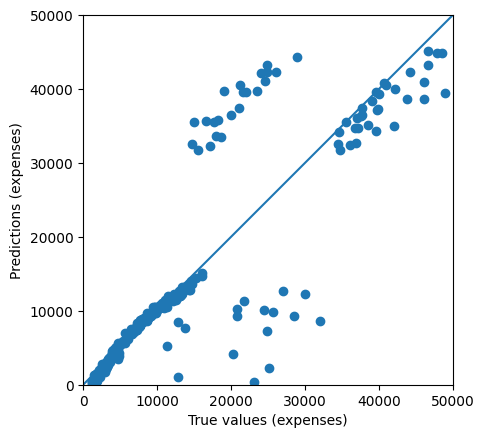

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)